In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [22]:
training = pd.read_csv('training_dataset.csv')

In [23]:
voltages = [0.975, 1, 1.1375, 1.362]
frequencies = [0.9, 1, 1.5, 2]
frequencies = [f * 1e9 for f in frequencies]

# Map voltages to frequencies
frequency_to_voltage = dict(zip(frequencies, voltages))

In [24]:
# Using the frequency_to_voltage map, create a new column in the training dataset that is calculated by V^2 * f
training['Dynamic Power'] = training['freq_big_cluster'].map(frequency_to_voltage) ** 2 * training['freq_big_cluster']


Feature: 0, Score: 0.09219
Feature: 1, Score: 0.06229
Feature: 2, Score: 0.00159
Feature: 3, Score: 0.11548
Feature: 4, Score: 0.12317
Feature: 5, Score: 0.07169
Feature: 6, Score: 0.02206
Feature: 7, Score: 0.07086
Feature: 8, Score: -0.27446
Feature: 9, Score: -0.00000
Feature: 10, Score: 0.00000


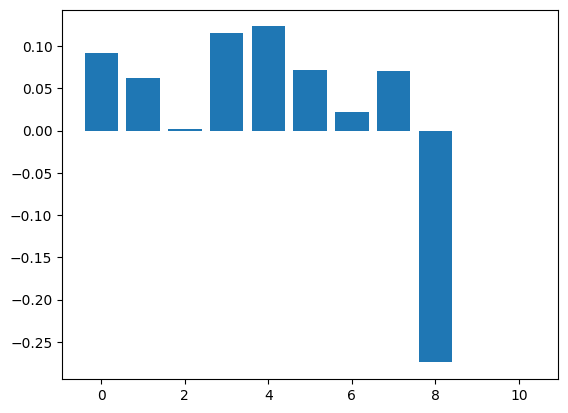

In [25]:
x = training.drop(["total_watts", "w_big", "w_little", "w_gpu", "w_mem"], axis=1)
y= training["w_big"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

reg = LinearRegression()

reg.fit(x_train, y_train)

import matplotlib.pyplot as plt
# get importance
importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()